In [1]:
# import data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import modules
import video.df as df
import video.exploration as ex
from importlib import reload

In [3]:
reload(df)

<module 'video.df' from '/Users/nadina/Documents/codeup/epilator/video/df.py'>

In [4]:
h = df.get_bgr_cdf('videos/Banned Pokemon Seizure Scene.mp4')

In [5]:
h.head(2)

,blue,green,red,sum_channels,sum_diff,normal
frame,,,,,,
0,118.6780,110.1946,85.3569,314.2295,NaN,NaN
1,118.6657,110.2012,85.3473,314.2142,-0.0153,0.009795


<Axes: xlabel='frame'>

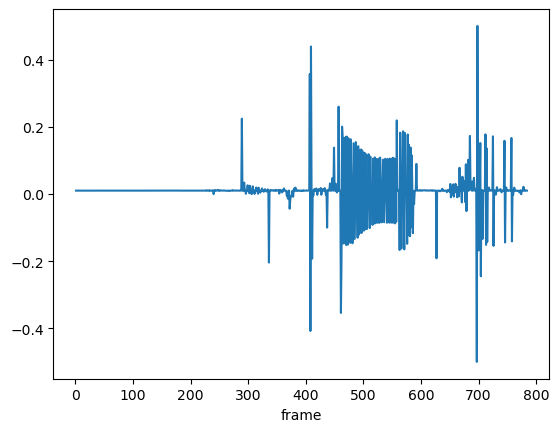

In [6]:
h.normal.plot()

In [13]:
reload(df)

<module 'video.df' from '/Users/nadina/Documents/codeup/epilator/video/df.py'>

In [14]:
s1 = df.get_bgr_cdf('videos/little hens and dog.mp4')

In [16]:
cdf = s1[:280]

In [17]:
cdf['normal'] = (cdf.sum_diff - cdf.sum_diff.min())/(cdf.sum_diff.max() - cdf.sum_diff.min()) - 0.5

<Axes: xlabel='frame'>

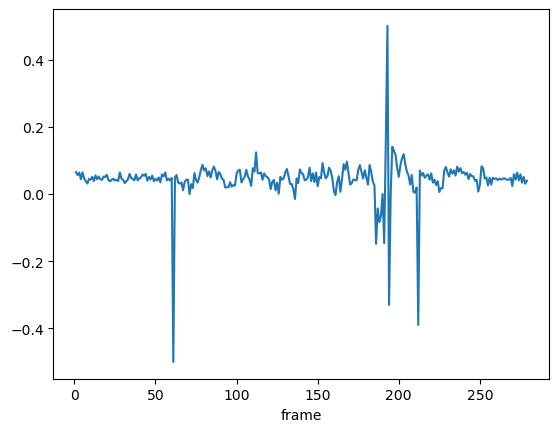

In [18]:
cdf.normal.plot()

In [7]:
s = df.get_bgr_cdf('videos/little hens and dog.mp4')

<Axes: xlabel='frame'>

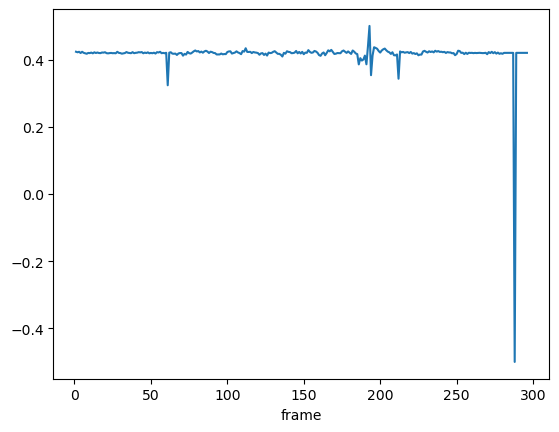

In [8]:
s.normal.plot()

In [9]:
r = df.get_bgr_cdf('videos/Red Spin.mp4')

<Axes: xlabel='frame'>

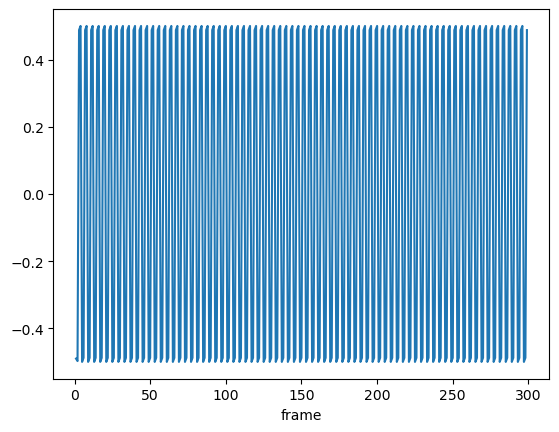

In [10]:
r.normal.plot()

In [11]:
bw = df.get_bgr_cdf('videos/Black White Flash.mp4')
# bw['sum_channels'] = bw.blue + bw.green + bw.red
# bw.sum_channels.plot()

<Axes: xlabel='frame'>

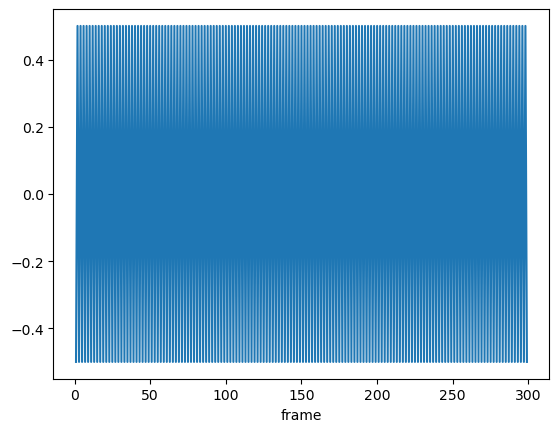

In [12]:
bw.normal.plot()

For all videos in `videos` folder plot the difference of color sum channel to see if it can be used to detect hazard with zero crossing as well. 

In [19]:
import os
import numpy as np 

In [23]:
reload(df)

<module 'video.df' from '/Users/nadina/Documents/codeup/epilator/video/df.py'>

In [20]:
directory_path = "videos"

# get the list of filenames in the directory
filenames = [directory_path+'/' + f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

In [22]:
filenames[:3]

['videos/Color Flash.mp4',
 'videos/Paparazzi flashes.mp4',
 'videos/Delete & Killshot - Disco Weapon [Epilepsy Warning].mp4']

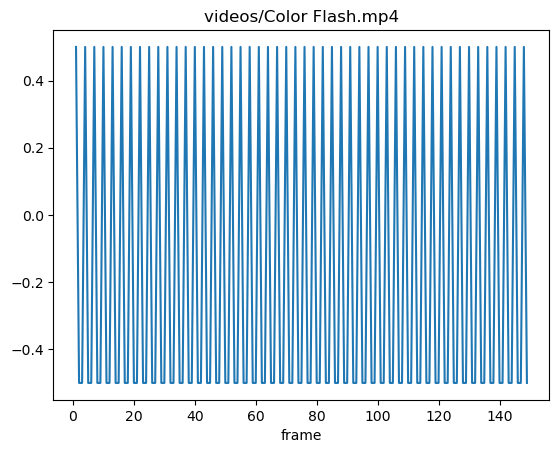

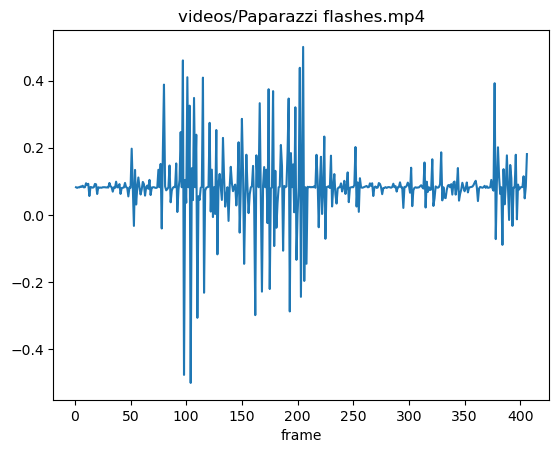

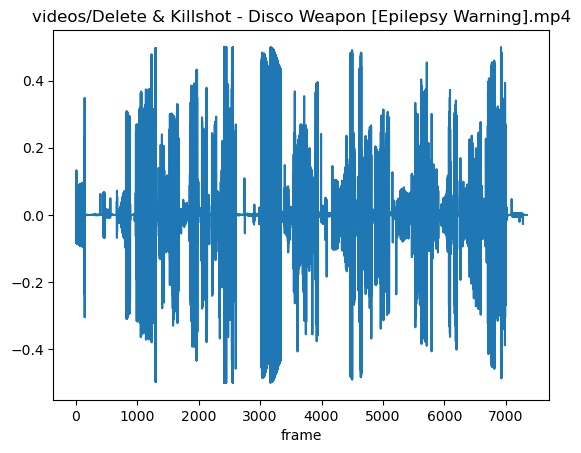

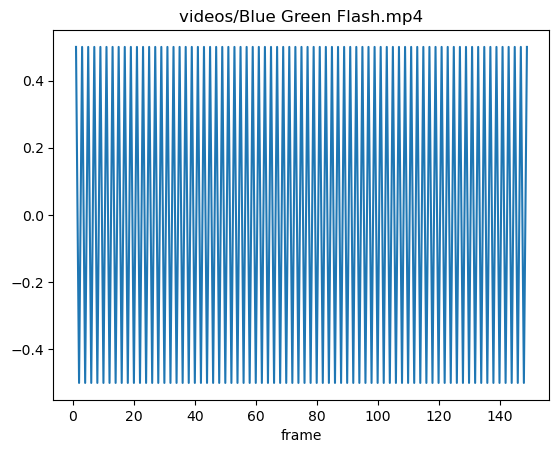

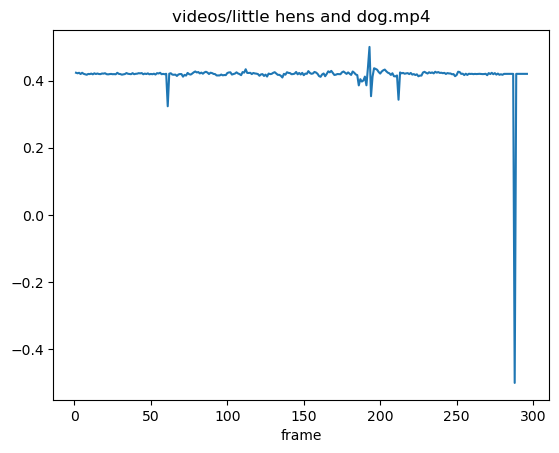

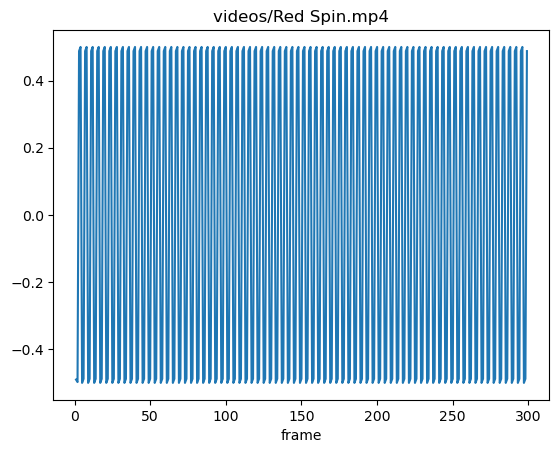

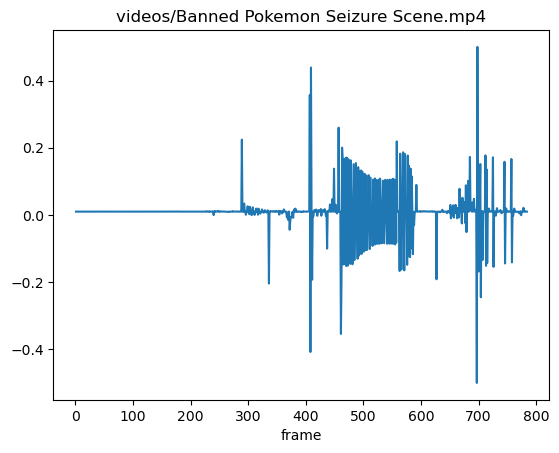

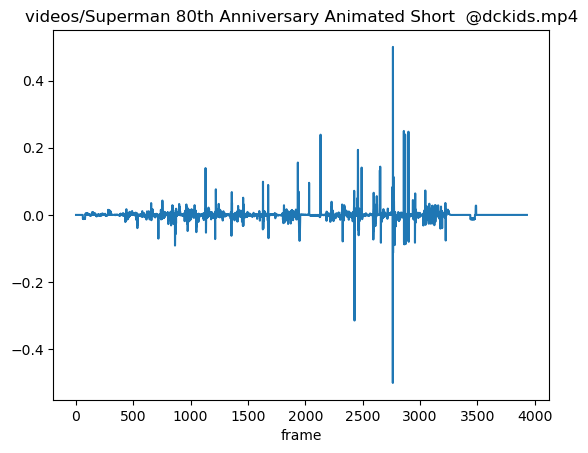

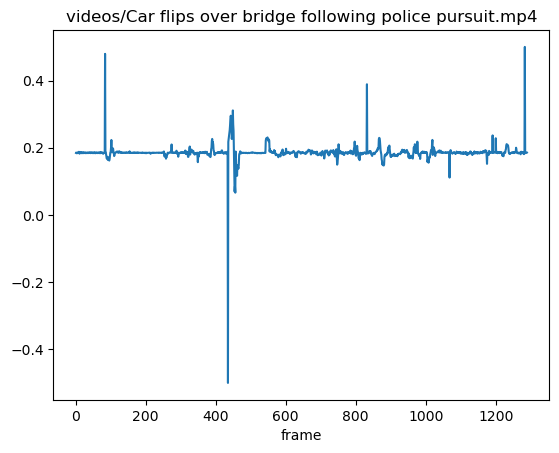

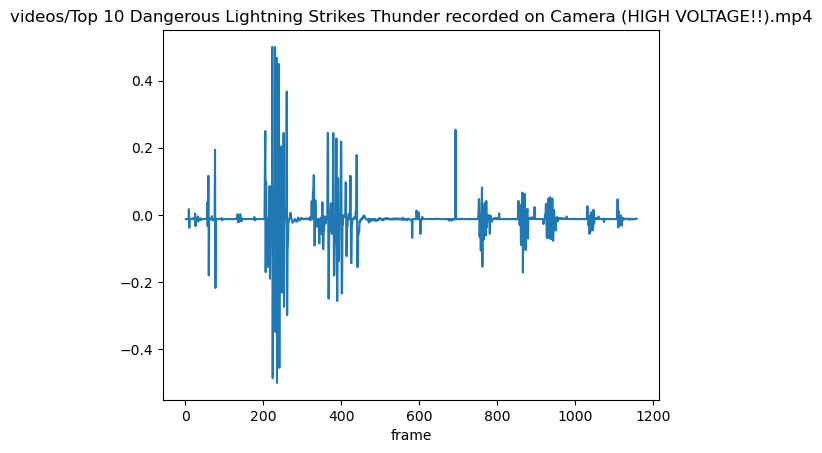

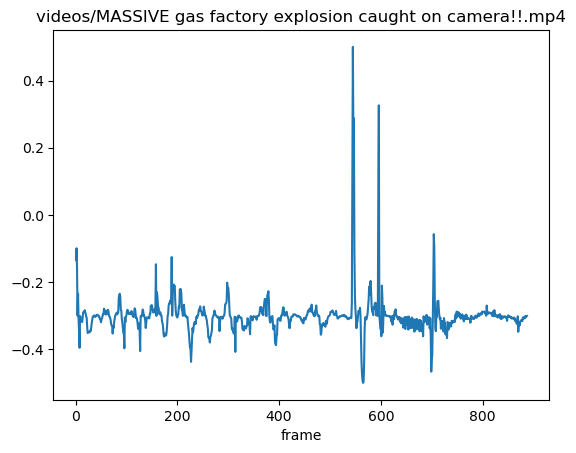

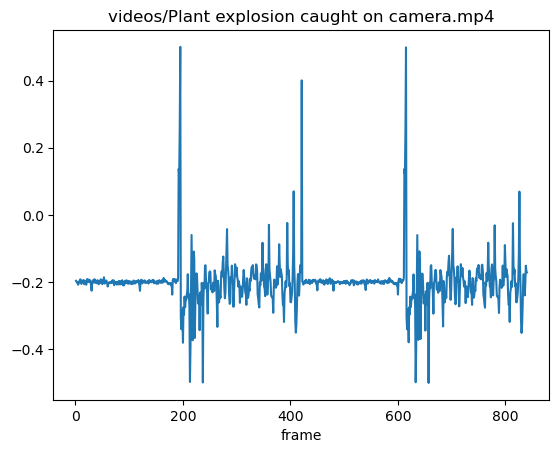

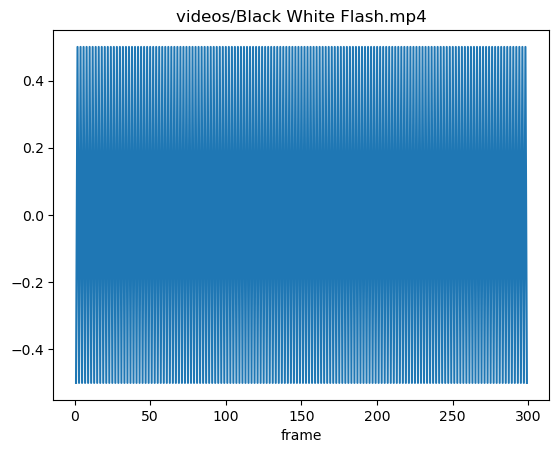

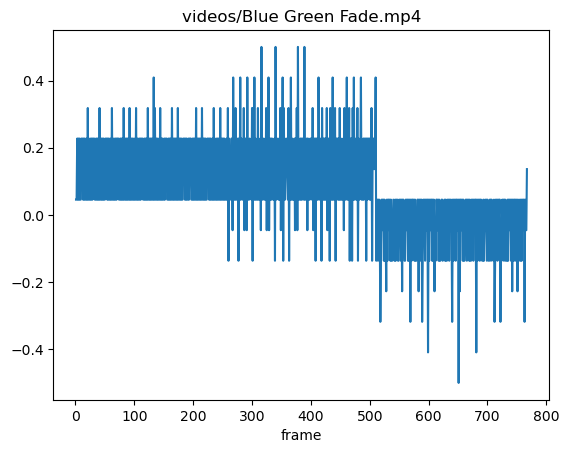

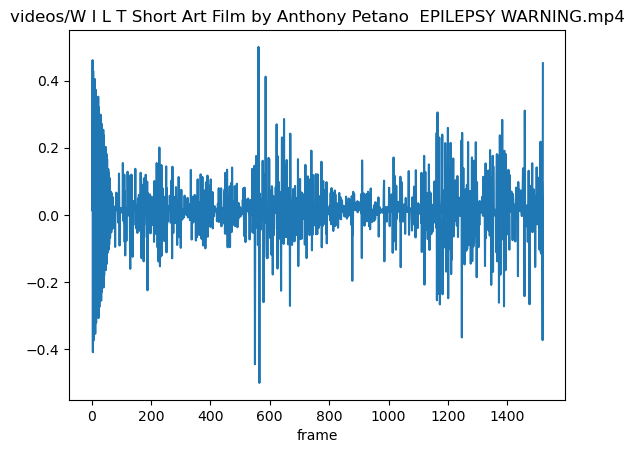

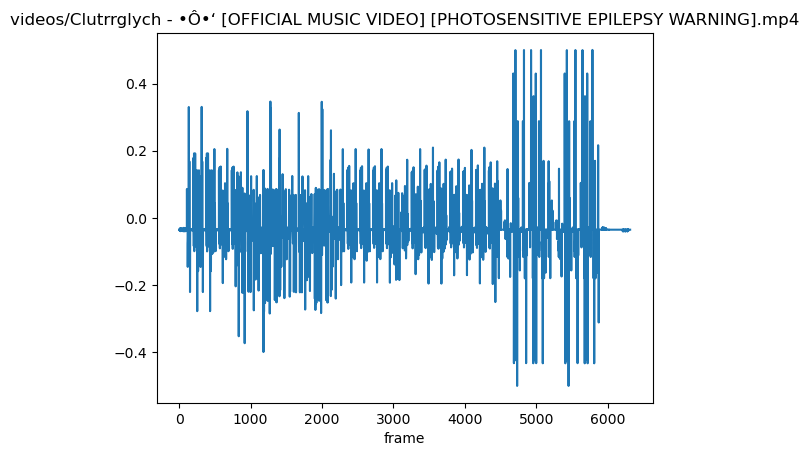

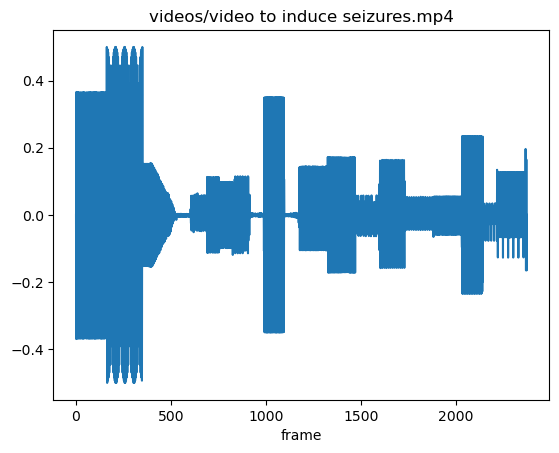

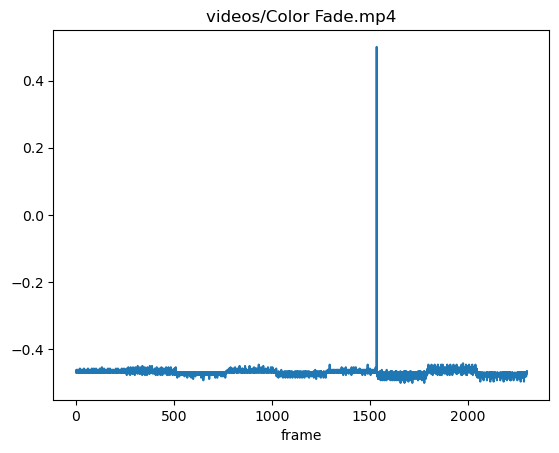

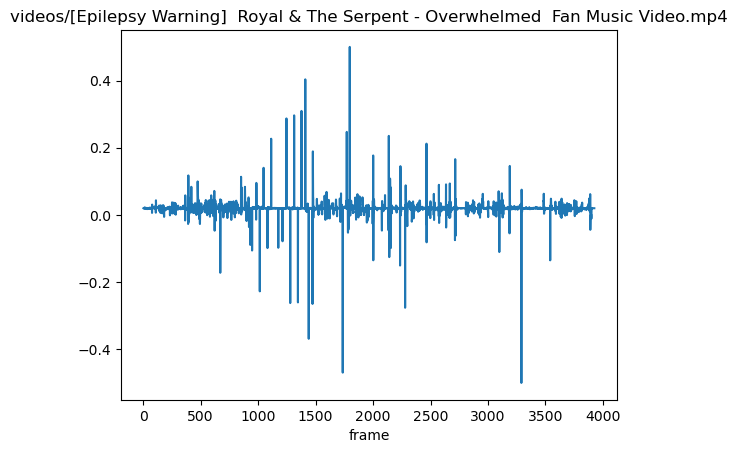

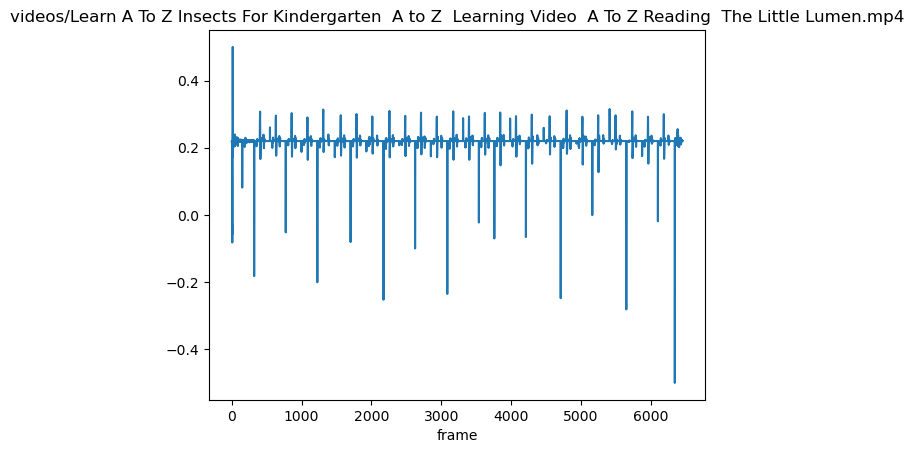

In [24]:
for fn in filenames:
    v = df.get_bgr_cdf(fn)
    plt.title(fn)
    v.normal.plot()
    plt.show()

__Takeaway__ some epilepsy warning videos change the number by a lot but don't cross zero.

For all videos in `videos` folder plot the normalized sum channel to see if it can be used to detect hazard with zero crossing as well. 

In [25]:
reload(df) # add the sum_normal column

<module 'video.df' from '/Users/nadina/Documents/codeup/epilator/video/df.py'>

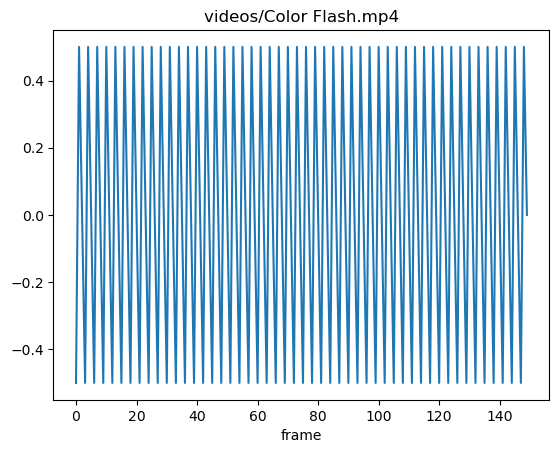

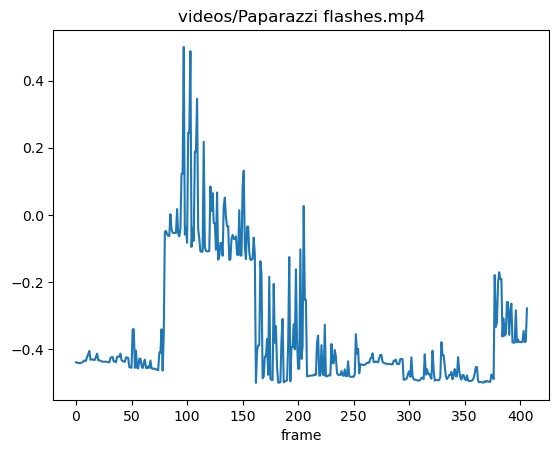

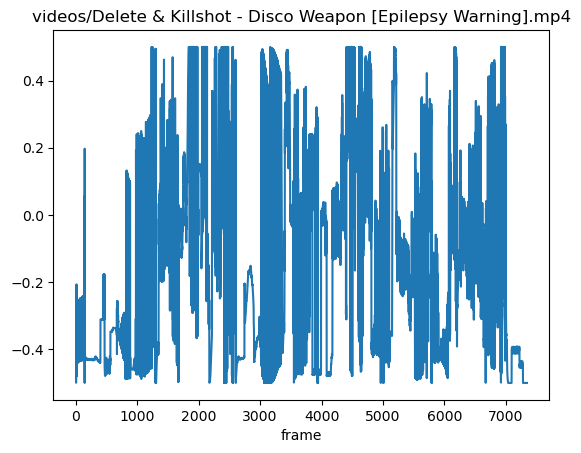

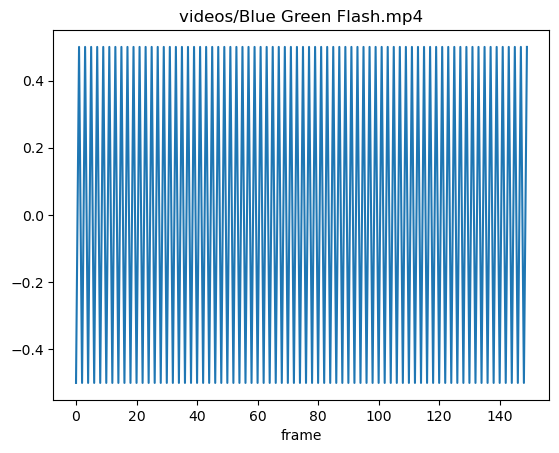

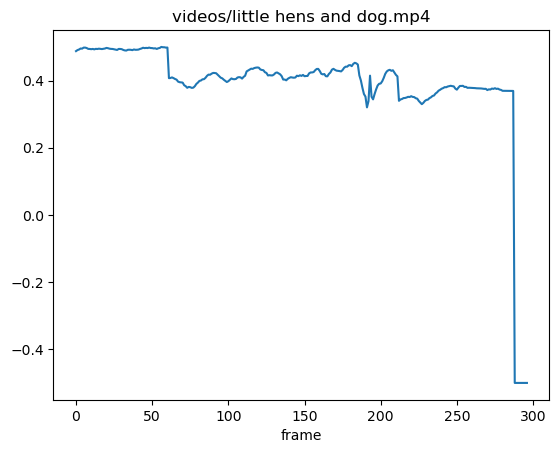

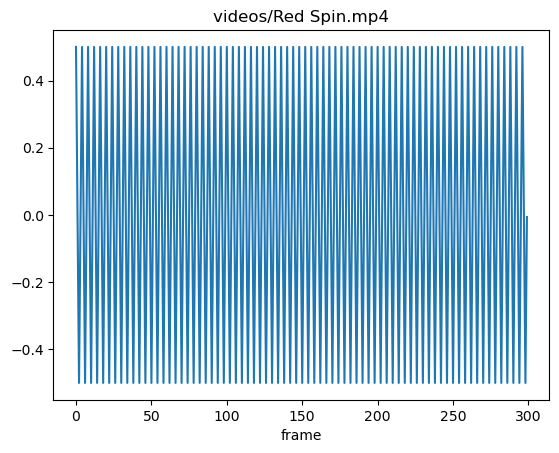

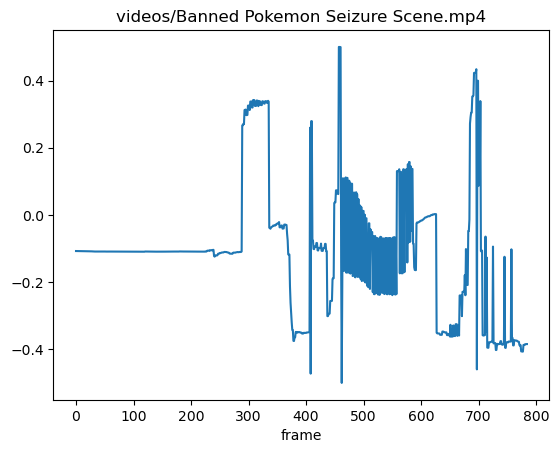

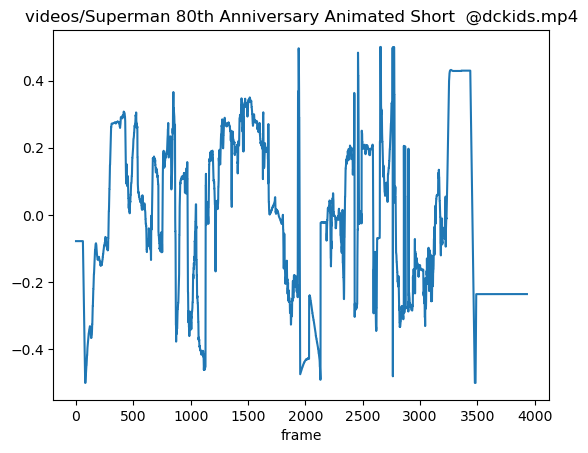

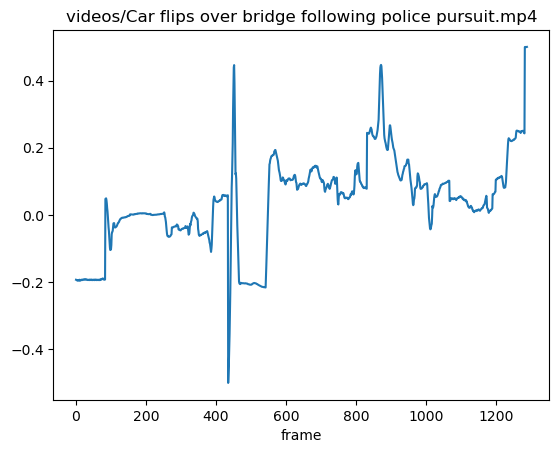

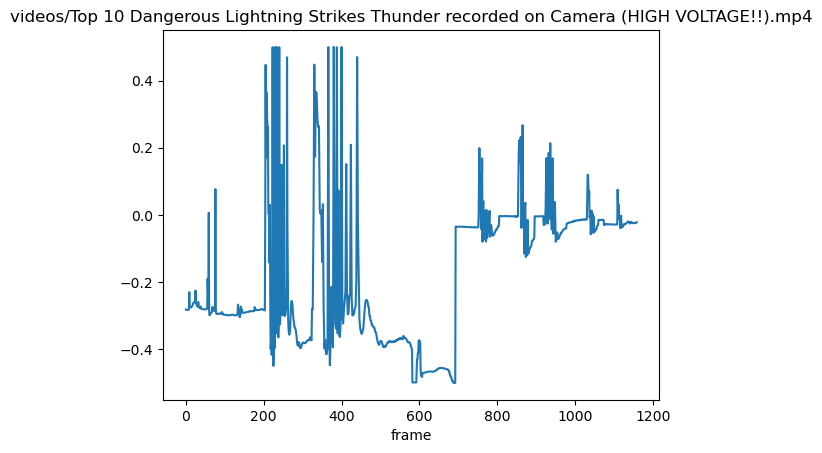

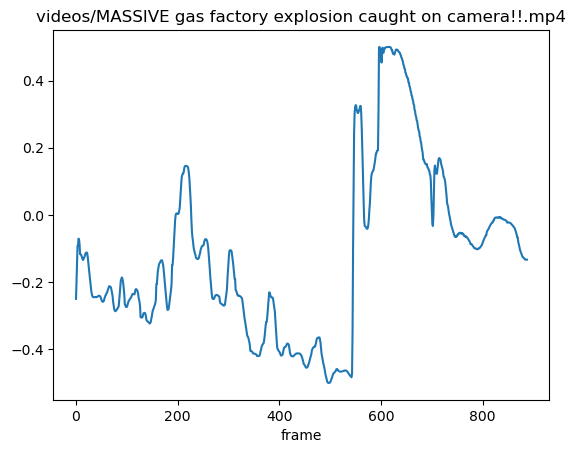

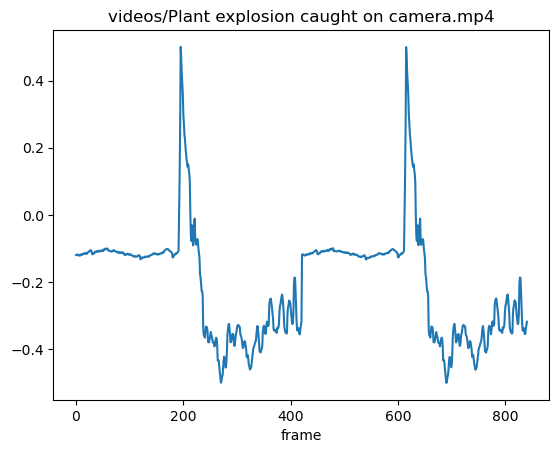

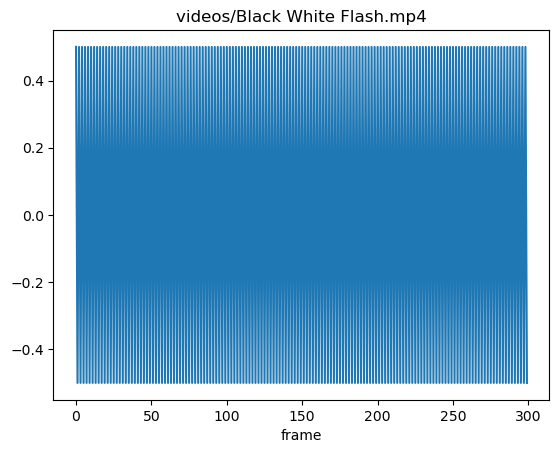

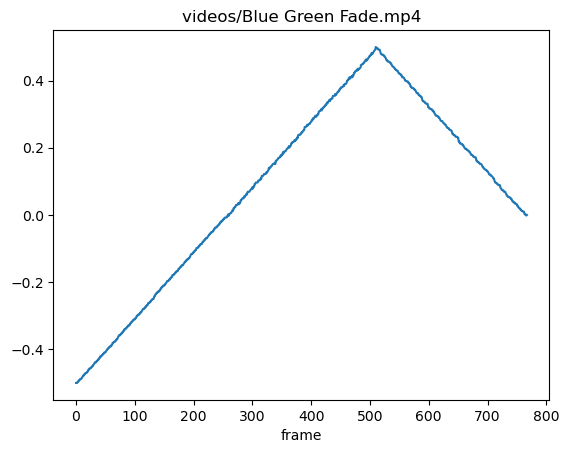

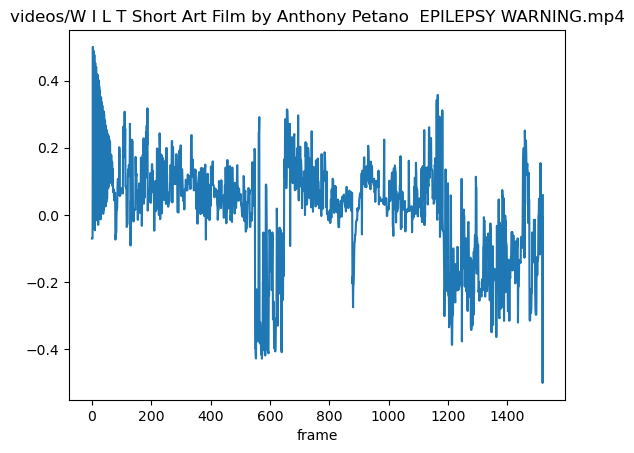

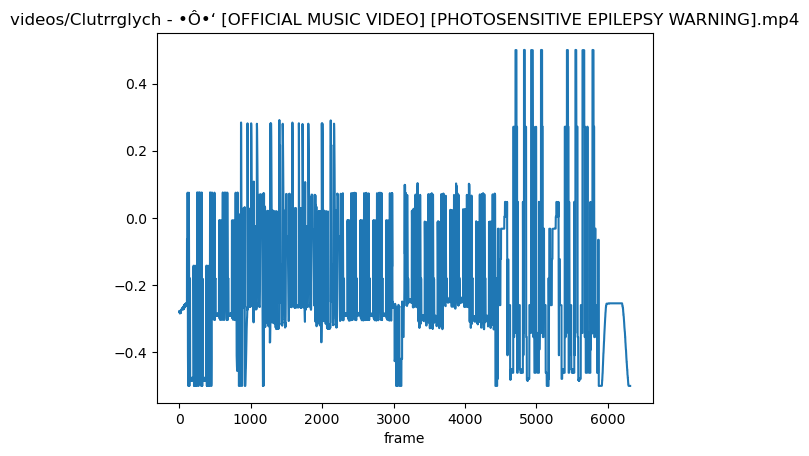

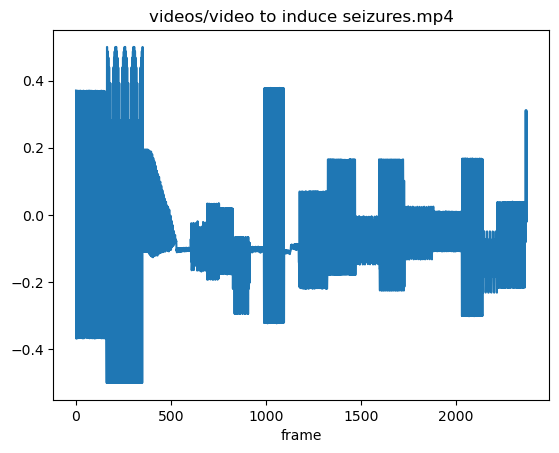

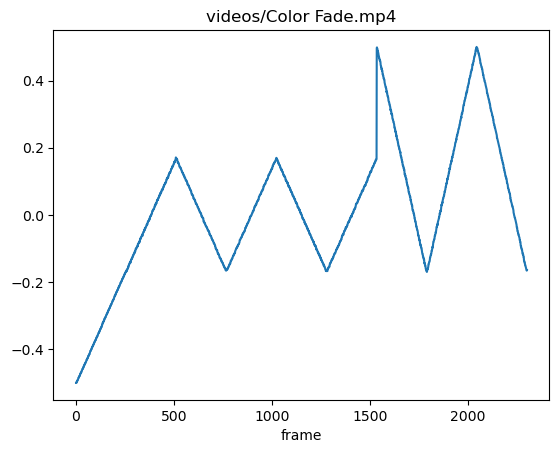

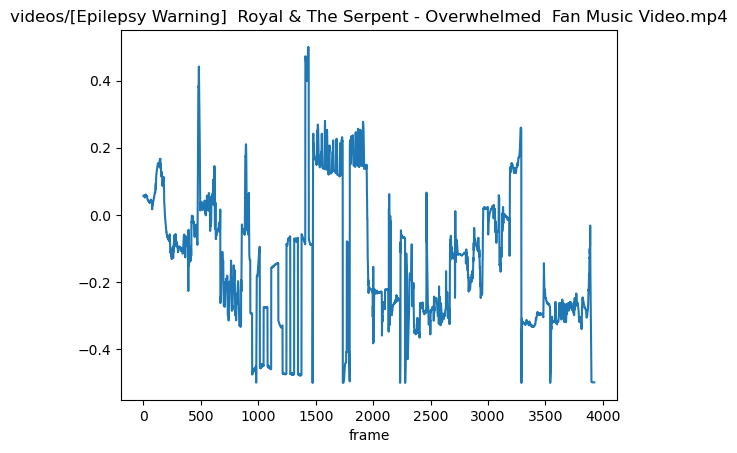

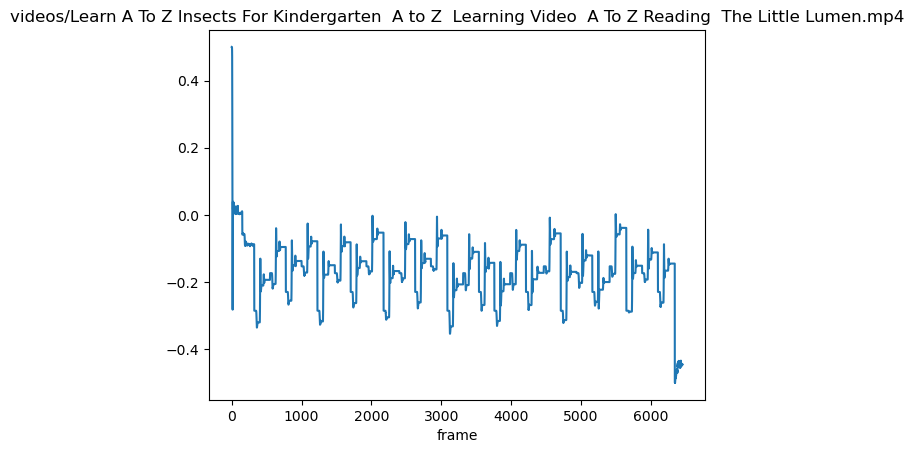

In [26]:
for fn in filenames:
    v = df.get_bgr_cdf(fn)
    plt.title(fn)
    v.sum_normal.plot()
    plt.show()

__Takeaway:__ sum of color channels by itself can not be used in the zero crossing algorithm

In [27]:
reload(df) # removed sum_normal

<module 'video.df' from '/Users/nadina/Documents/codeup/epilator/video/df.py'>

Test the videos from the `safe_videos` folder

In [28]:
directory_path = "safe_videos"

# get the list of filenames in the directory
filenames = [directory_path+'/' + f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

In [29]:
filenames[-3:]

['safe_videos/Funniest Cat Videos Compilation in 2 Minute.mp4',
 'safe_videos/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.mp4',
 'safe_videos/Cute Minutes - Two Minutes Funny Puppy Videos Compilation 1  FeenZoo.mp4']

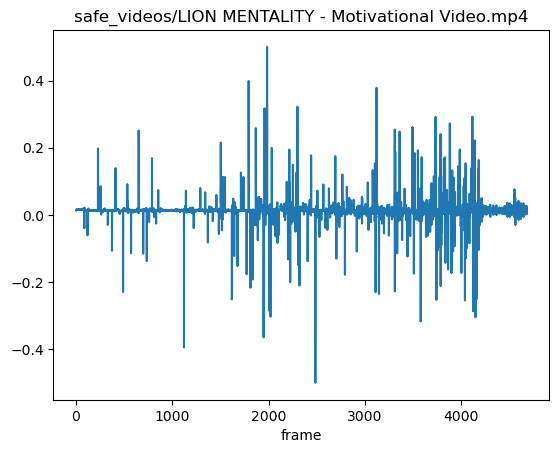

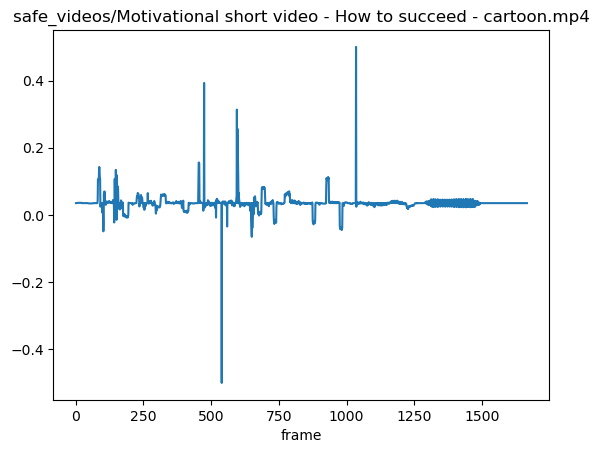

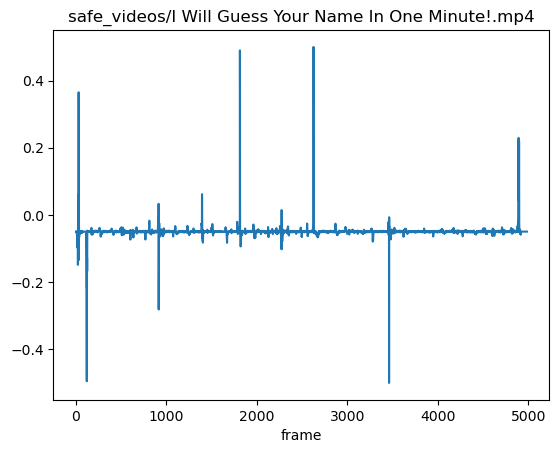

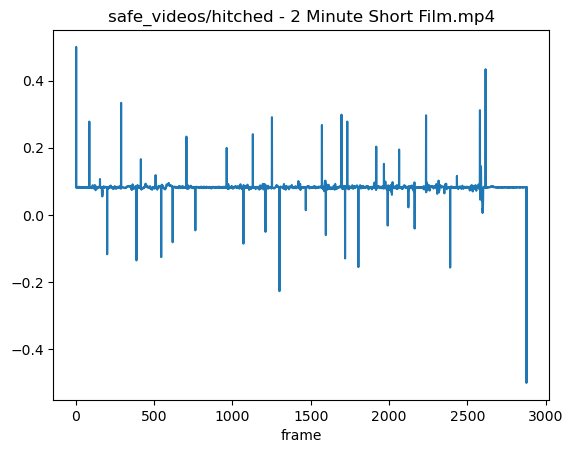

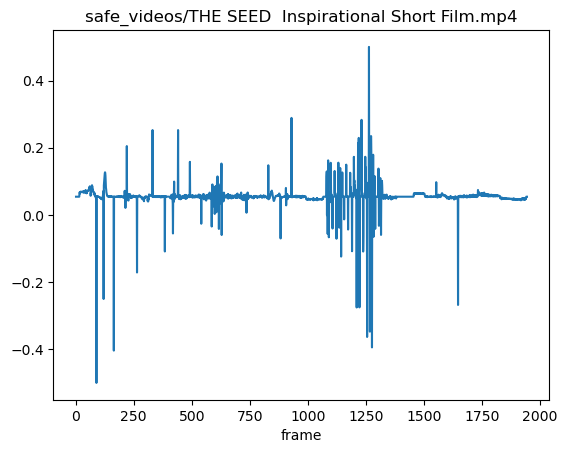

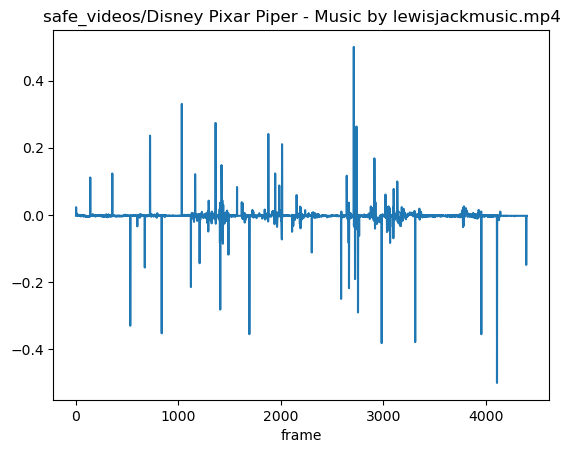

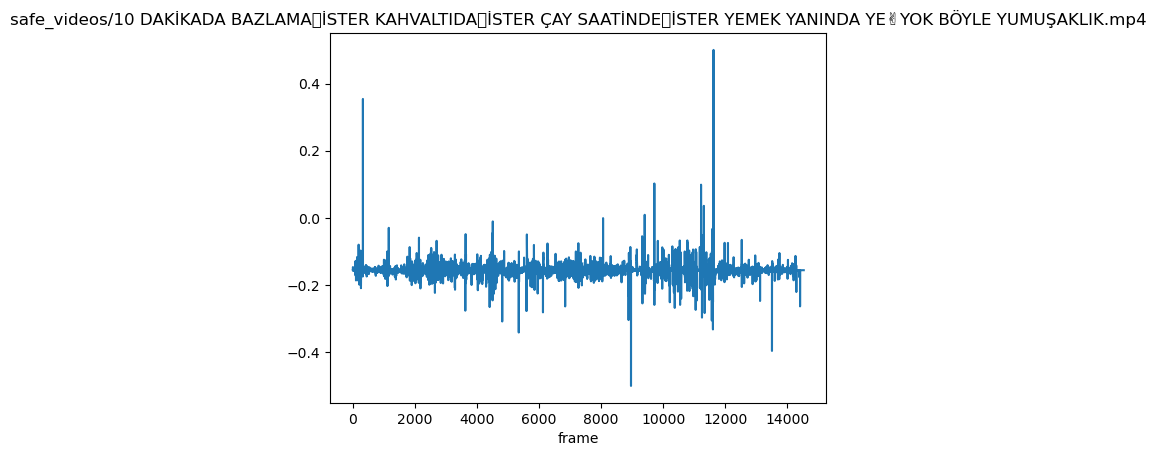

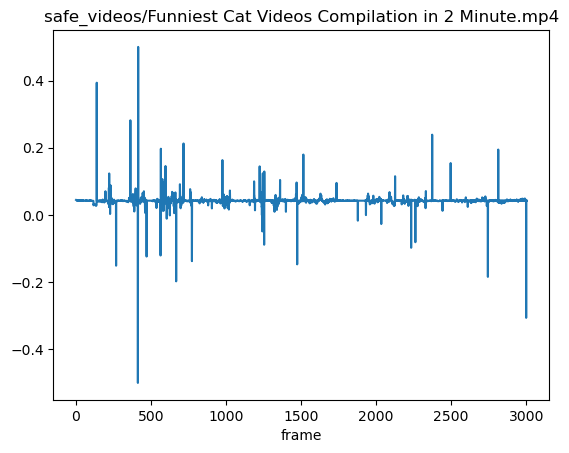

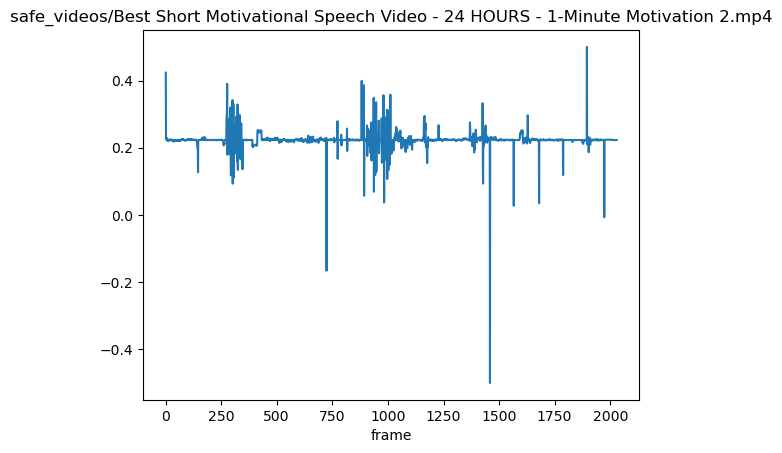

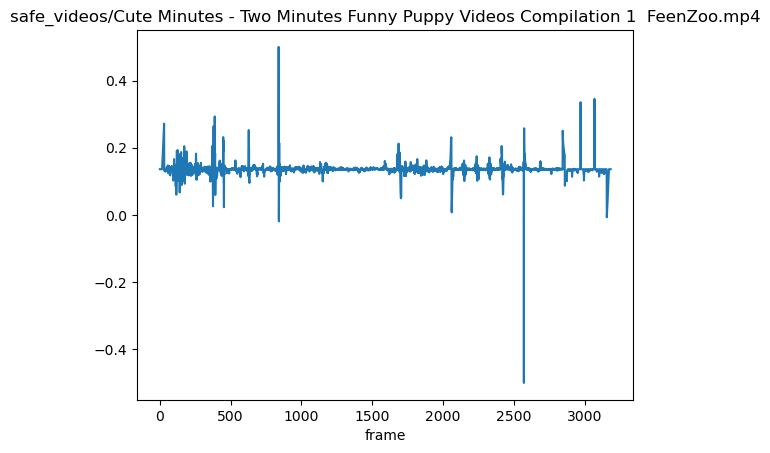

In [30]:
for fn in filenames:
    v = df.get_bgr_cdf(fn)
    plt.title(fn)
    v.normal.plot()
    plt.show()

Visually BGR zero crossing shows better results on "safe" videos. Next step to plot lightness difference vs sum of BGR channels difference and visually compare the results. Then we need to run and algorithm on both and write down the hazard seconds of each video.